# Author Classification Using a KNN Analysis

# Question 1 : Introduction

## KNN : K Nearest Neighbor

## Definition of KNN Algorithm

KNN is the algorithm that can be used for classification, identification or regression task. In K Nearest Neighbor, we have collcetion of data sets of perticular category let's say group A and group B. Next we have simillar data set that has not been identified as any of given category. We have to use KNN to decide if the unknow data set can be classified as group A or group B.  

## How KNN Works?

For unknown data set, KNN tries to determine what group a data point belongs to by looking at the data points around it. For that, we need to calculate distance between unknow data point to all the nearest data point. From that result, if the majority of data points are in group A, it's very likely that the data point in unknown data set is in group A and vice versa.

## Problem Statement

In this lab I have to analyze the written works of 2 different authors and use the K-Nearest Neighbors (KNN) classification algorithm to classify an additional work by each author. 

For a given problem statement I need 5 works from each author as the initial data vectors, and a 6th work from each to test the classification algorithm (the 6th work from each author will be referred to as our "unknown author" data, despite us actually knowing the author).


## Steps to collect Author works

Used [Project Gutenberg](https://www.gutenberg.org/browse/recent/last1) to get two differnt Author works.

1. As per your choice, select first name of Author and below it will display the list of books name of their Authors with hyperlink.
2. Select any of the books you like and it will redirect you on that page. It is showing different formats of eBook such as HTML5, HTML, EPUB, PDF, Kindle, Plain Text UTF-8 format.
3. Select Plain Text UTF-8 format.
4. **Removed Project Gutenberg headers** and save the file as per below naming convention in `~/public_html/authors/` directory.

As per my First and Last name, I took two Authors starts with V and M and download 6 works of each.

m1.txt - Author M, Literary Work 1

m2.txt - Author M, Literary Work 2

...

m5.txt - Author M, Literary Work 5

v1.txt - Author V, Literary Work 1

v2.txt - Author V, Literary Work 2

...

v5.txt - Author V, Literary Work 5

um.txt - Unknown author (Author M)

uv.txt - Unknown author (Author V)

# Question 2 : Word Counts: Extract Dimensions of Analysis from Literary Works

1. Create `author_parse.py` file.

2. Define `read_txt_file` function and fetch the url from command-line argument.

3. Read the data from URL using **urllib**, make all read data to lower case and data start with a to z and space.

`with urllib.request.urlopen(uri) as req:
        data = req.read().decode('utf-8')
        data = data.lower()
        data = re.sub(r"[^a-z\s]", "", data)`

4. Split it into individual words and remove beginning and ending punctuation from the word and generate **word_list**.

`words = re.split(r"\s+", data)
 word_list = [ w.strip(punctuation) for w in words]`

5. Initialied empty `result` dictionary to store the final result data.

`result = {}`

6. Iterate over each word in list and checked if the word is already present in dictionary then increment word count by 1; else add the word to dictionary with count 1.

`for word in word_list:
       if word in result:
             result[word] += 1
       else:
             result[word] = 1`

7. print final result with given format.

`total_length = len(word_list)
 print("Word,Frequency")
 for key in list(result.keys()):
        rint(str(key) + "," + str("{:.7f}".format(result[key]/total_length)))`

8. Run the file with below sample command to store resulting standard output to CSV file.

`./author_parse.py "https://cs.indstate.edu/~cs50114/authors/m1.txt" > ~/public_html/authors/m1.csv`    

# Question 3 : Pandas Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from itertools import combinations

In [2]:
url_prefix = "https://cs.indstate.edu/~cs50114/authors/"
url_suffix = ".csv"

df = pd.read_csv(url_prefix + "m1" + url_suffix)
df

,Word,Frequency
0,famous,0.000112
1,stories,0.000295
2,every,0.000672
3,child,0.001140
4,should,0.001018
...,...,...
9511,facility,0.000010
9512,includes,0.000010
9513,produce,0.000010
9514,subscribe,0.000010


In [3]:
# return the first n rows.
df.head()

,Word,Frequency
0,famous,0.000112
1,stories,0.000295
2,every,0.000672
3,child,0.001140
4,should,0.001018


In [4]:
# return the last n rows.
df.tail()

,Word,Frequency
9511,facility,0.00001
9512,includes,0.00001
9513,produce,0.00001
9514,subscribe,0.00001
9515,newsletter,0.00001


In [5]:
# refer to the row of 0 index
df.loc[0]

Word           famous
Frequency    0.000112
Name: 0, dtype: object

In [6]:
# print a concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516 entries, 0 to 9515
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Word       9516 non-null   object 
 1   Frequency  9516 non-null   float64
dtypes: float64(1), object(1)
memory usage: 148.8+ KB


In [7]:
# generate descriptive statistics
df.describe()

,Frequency
count,9516.000000
mean,0.000105
std,0.001009
min,0.000010
25%,0.000010
50%,0.000020
75%,0.000041
max,0.060737


In [8]:
# attempt to infer better dtypes for object columns
df.infer_objects()

,Word,Frequency
0,famous,0.000112
1,stories,0.000295
2,every,0.000672
3,child,0.001140
4,should,0.001018
...,...,...
9511,facility,0.000010
9512,includes,0.000010
9513,produce,0.000010
9514,subscribe,0.000010


In [9]:
# make a copy of this object's indices and data
df.copy()

,Word,Frequency
0,famous,0.000112
1,stories,0.000295
2,every,0.000672
3,child,0.001140
4,should,0.001018
...,...,...
9511,facility,0.000010
9512,includes,0.000010
9513,produce,0.000010
9514,subscribe,0.000010


In [10]:
# return the minimum of the values over the requested axis
df.min()

Word               a
Frequency    0.00001
dtype: object

In [11]:
# return the maximum of the values over the requested axis
df.max()

Word             zulu
Frequency    0.060737
dtype: object

In [12]:
# check any null value present in data
df.isnull().sum()

Word         0
Frequency    0
dtype: int64

# Question 4 : Dimensions of Analysis

## Select your 3 dimensions of analysis

In the below data frame, I'm reading the csv file and first sorting the data by Words.
The rows will be the works of each Author and the columns will be the dimensions of analysis (a particular word frequency).

Here, there are more than 1000 dimensions. So to make a feasible and proper understanding of data visualization, I'm  selecting 3 dimensions of analysis.

After calculating all the Author works, I constructed one large pandas DataFrame **final_result** containing all 12 literary works and all associated dimensions of analysis.

But the final table should only contain words found in every work, and it should be filtered down to only contain around 100 words. So, I identified the list of words present in all 12 works and created a final data frame named **display_data**.

## Did you look for clustering? Are the dimensions normalized? Do they need to be? Explain why or why not.

Clustering is the method of identifying similar groups of data in a dataset.

Yes, I looked at clustering for KNN decision (To identify my unknown author data "is author V or author M"). 

We have a different range of dataset while calculating Frequency of each work. To display data in a graph with a proper scale of  1 unit of x = 1 unit of y, we need to normalize the data. We do min/max normalization of range (0,1).
Example: We count the lowest value in x position as 0, highest value in x position as 1 and we position everything between 0 and 1. so the unit will become 0 and 1.

In KNN, scale features are important for distance calculation. That's why data normalization is required.

For the word frequencies I do not need to normalize, because each dimension is already on the same scale (frequency of use).

# Question 5 : Pandas Data Frame

In [13]:
df1 = pd.read_csv(url_prefix + "m1" + url_suffix)
df1.sort_values(by=['Word'], inplace=True)
col_list_1 = df1.Word.values.tolist()
row_list_1 = df1.Frequency.values.tolist()

df1 = pd.DataFrame(columns = col_list_1)
df1.loc['m1'] = row_list_1
df1

,a,aaron,abandon,abandoned,abashed,abates,abe,aberdeen,abide,abides,...,yule,zachtlevens,zeal,zealously,zembla,zenith,zillerthal,zip,zitzenhausen,zulu
m1,0.021349,0.00002,0.00001,0.00002,0.00001,0.00001,0.00002,0.00001,0.000041,0.00001,...,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001,0.00001


In [14]:
df2 = pd.read_csv(url_prefix + "m2" + url_suffix)
df2.sort_values(by=['Word'], inplace=True)
col_list_2 = df2.Word.values.tolist()
row_list_2 = df2.Frequency.values.tolist()

df2 = pd.DataFrame(columns = col_list_2)
df2.loc['m2'] = row_list_2
df2

,a,ab,aback,abandoned,abide,ability,able,abode,aboukir,about,...,youngster,your,youre,yours,yourself,youve,yuther,yuthers,zebedee,zip
m2,0.021469,0.000063,0.000021,0.000063,0.000021,0.000021,0.000167,0.000021,0.000042,0.001603,...,0.001249,0.002166,0.00025,0.000063,0.000271,0.000042,0.000021,0.000021,0.000021,0.000021


In [15]:
df3 = pd.read_csv(url_prefix + "m3" + url_suffix)
df3.sort_values(by=['Word'], inplace=True)
col_list_3 = df3.Word.values.tolist()
row_list_3 = df3.Frequency.values.tolist()

df3 = pd.DataFrame(columns = col_list_3)
df3.loc['m3'] = row_list_3
df3

,a,abandoned,abated,abates,abbess,abbey,abbeys,abbot,abbots,abbreviated,...,yourselves,youth,youthful,youths,zaragoza,zeal,zealous,zeus,zip,zulema
m3,0.016613,0.00001,0.00001,0.00001,0.00001,0.000095,0.00001,0.000276,0.00001,0.00001,...,0.000048,0.000181,0.00001,0.000019,0.00001,0.000048,0.00001,0.000095,0.00001,0.000038


In [16]:
df4 = pd.read_csv(url_prefix + "m4" + url_suffix)
df4.sort_values(by=['Word'], inplace=True)
col_list_4 = df4.Word.values.tolist()
row_list_4 = df4.Frequency.values.tolist()

df4 = pd.DataFrame(columns = col_list_4)
df4.loc['m4'] = row_list_4
df4

,a,abandonment,abide,abides,abilities,ability,able,abounding,about,above,...,yielded,yields,yoke,york,you,young,your,youth,youtha,zip
m4,0.021166,0.00003,0.00003,0.00003,0.00003,0.000518,0.000183,0.00003,0.0007,0.000152,...,0.000061,0.00003,0.00003,0.00003,0.001858,0.000335,0.000396,0.000853,0.00003,0.00003


In [17]:
df5 = pd.read_csv(url_prefix + "m5" + url_suffix)
df5.sort_values(by=['Word'], inplace=True)
col_list_5 = df5.Word.values.tolist()
row_list_5 = df5.Frequency.values.tolist()

df5 = pd.DataFrame(columns = col_list_5)
df5.loc['m5'] = row_list_5
df5

,a,abandon,abbey,abide,ability,able,abnormal,abnormally,abounds,about,...,younger,your,yourself,youth,youthfreshness,youthful,zest,zip,zology,NaN
m5,0.018457,0.000026,0.000026,0.000026,0.000131,0.000209,0.000052,0.000026,0.000026,0.001149,...,0.000026,0.000287,0.000026,0.000052,0.000026,0.000026,0.000104,0.000026,0.000026,0.000026


In [18]:
df6 = pd.read_csv(url_prefix + "um" + url_suffix)
df6.sort_values(by=['Word'], inplace=True)
col_list_6 = df6.Word.values.tolist()
row_list_6 = df6.Frequency.values.tolist()

df6 = pd.DataFrame(columns = col_list_6)
df6.loc['um'] = row_list_6
df6

,a,aaron,aarons,abandoned,abandonment,abashment,abate,abb,abbey,abbot,...,zeal,zealous,zell,zenith,zigzag,zing,zome,zona,zong,zoo
um,0.021643,0.000098,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000022,...,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000066,0.000011,0.000011


In [19]:
df7 = pd.read_csv(url_prefix + "v1" + url_suffix)
df7.sort_values(by=['Word'], inplace=True)
col_list_7 = df7.Word.values.tolist()
row_list_7 = df7.Frequency.values.tolist()

df7 = pd.DataFrame(columns = col_list_7)
df7.loc['v1'] = row_list_7
df7

,a,abandoned,abide,ablaze,able,about,aboutit,above,abroad,abruptly,...,yousee,youso,youth,youthful,youwanttoseehimverybadlyindeed,youwhat,youyou,ze,zip,zo
v1,0.020979,0.000023,0.000023,0.000046,0.000347,0.002449,0.000023,0.000092,0.000092,0.000023,...,0.000023,0.000023,0.000116,0.000023,0.000023,0.000023,0.000023,0.000069,0.000023,0.000023


In [20]:
df8 = pd.read_csv(url_prefix + "v2" + url_suffix)
df8.sort_values(by=['Word'], inplace=True)
col_list_8 = df8.Word.values.tolist()
row_list_8 = df8.Frequency.values.tolist()

df8 = pd.DataFrame(columns = col_list_8)
df8.loc['v2'] = row_list_8
df8

,a,abandon,abandoned,abandonment,abashed,abetted,abide,abilities,ability,able,...,yourselflook,yourselves,youth,youthat,youthful,youve,youwhat,zest,zip,NaN
v2,0.023252,0.000012,0.000025,0.000012,0.000037,0.000012,0.000012,0.000012,0.000012,0.000234,...,0.000012,0.000074,0.000148,0.000012,0.000025,0.000012,0.000012,0.000025,0.000012,0.003484


In [21]:
df9 = pd.read_csv(url_prefix + "v3" + url_suffix)
df9.sort_values(by=['Word'], inplace=True)
col_list_9 = df9.Word.values.tolist()
row_list_9 = df9.Frequency.values.tolist()

df9 = pd.DataFrame(columns = col_list_9)
df9.loc['v3'] = row_list_9
df9

,a,aa,aback,abandon,abandoned,abased,abbey,abhor,abhorrent,abide,...,youthe,youthful,youths,youto,youve,youwilltakeme,yule,zealously,zip,zone
v3,0.027445,0.000013,0.000013,0.000026,0.000039,0.000013,0.000013,0.000013,0.000013,0.000013,...,0.000013,0.000026,0.000013,0.000013,0.000066,0.000013,0.000013,0.000013,0.000013,0.000013


In [22]:
df10 = pd.read_csv(url_prefix + "v4" + url_suffix)
df10.sort_values(by=['Word'], inplace=True)
col_list_10 = df10.Word.values.tolist()
row_list_10 = df10.Frequency.values.tolist()

df10 = pd.DataFrame(columns = col_list_10)
df10.loc['v4'] = row_list_10
df10

,a,abashed,abide,ability,able,abominable,abominably,about,above,abroad,...,youngtoo,your,youre,yours,yourself,yourselves,yous,youth,youve,zip
v4,0.021552,0.000048,0.000016,0.000016,0.000285,0.000016,0.000016,0.002423,0.000016,0.000127,...,0.000016,0.00323,0.000016,0.000095,0.000443,0.000063,0.000016,0.000142,0.000032,0.000016


In [23]:
df11 = pd.read_csv(url_prefix + "v5" + url_suffix)
df11.sort_values(by=['Word'], inplace=True)
col_list_11 = df11.Word.values.tolist()
row_list_11 = df11.Frequency.values.tolist()

df11 = pd.DataFrame(columns = col_list_11)
df11.loc['v5'] = row_list_11
df11

,a,aback,abandon,abandoned,abandoning,abandonment,abashed,abbreviated,abc,abeam,...,yourselves,youshall,youth,youthey,youthful,youto,youve,youyou,zest,zip
v5,0.026662,0.000011,0.000011,0.000033,0.000022,0.000011,0.000011,0.000011,0.000011,0.000022,...,0.000044,0.000011,0.000327,0.000011,0.000065,0.000011,0.000229,0.000022,0.000033,0.000011


In [24]:
df12 = pd.read_csv(url_prefix + "uv" + url_suffix)
df12.sort_values(by=['Word'], inplace=True)
col_list_12 = df12.Word.values.tolist()
row_list_12 = df12.Frequency.values.tolist()

df12 = pd.DataFrame(columns = col_list_12)
df12.loc['uv'] = row_list_12
df12

,a,abandon,abandoned,abashed,abbey,abetting,abhor,abhorred,abide,ablaze,...,yousaid,youth,youthbernardher,youthful,youto,youve,youyou,zenith,zest,zip
uv,0.026312,0.000009,0.000027,0.000027,0.000009,0.000009,0.000009,0.000018,0.000018,0.000018,...,0.000009,0.00018,0.000009,0.000063,0.000009,0.000153,0.000018,0.000009,0.000018,0.000009


In [25]:
rs = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12], axis=0)
result = pd.DataFrame(rs)
final_result = result.fillna(0)
final_result

,a,aaron,abandon,abandoned,abashed,abates,abe,aberdeen,abide,abides,...,yetlife,youin,youis,youmarry,youmost,youngand,youngim,yourselfif,yousaid,youthbernardher
m1,0.021349,0.000020,0.000010,0.000020,0.000010,0.00001,0.000020,0.00001,0.000041,0.000010,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
m2,0.021469,0.000000,0.000000,0.000063,0.000000,0.00000,0.000000,0.00000,0.000021,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
m3,0.016613,0.000000,0.000000,0.000010,0.000000,0.00001,0.000114,0.00000,0.000057,0.000019,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
m4,0.021166,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000030,0.000030,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
m5,0.018457,0.000000,0.000026,0.000000,0.000000,0.00000,0.000000,0.00000,0.000026,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
um,0.021643,0.000098,0.000000,0.000011,0.000000,0.00000,0.000000,0.00000,0.000033,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
v1,0.020979,0.000000,0.000000,0.000023,0.000000,0.00000,0.000000,0.00000,0.000023,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
v2,0.023252,0.000000,0.000012,0.000025,0.000037,0.00000,0.000000,0.00000,0.000012,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
v3,0.027445,0.000000,0.000026,0.000039,0.000000,0.00000,0.000000,0.00000,0.000013,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
v4,0.021552,0.000000,0.000000,0.000000,0.000048,0.00000,0.000000,0.00000,0.000016,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [26]:
common_word_set = set(col_list_1) & set(col_list_2) & set(col_list_3) & set(col_list_4) & set(col_list_5) & set(col_list_6) & set(col_list_7) & set(col_list_8) & set(col_list_9)& set(col_list_10) & set(col_list_11) & set(col_list_12)
common_word_list = sorted(common_word_set)
# common_word_list = common_word_list[:100]
common_word_list

['a',
 'abide',
 'able',
 'about',
 'above',
 'accept',
 'accepted',
 'accepting',
 'access',
 'accomplished',
 'account',
 'act',
 'active',
 'addition',
 'additional',
 'additions',
 'address',
 'affairs',
 'after',
 'again',
 'against',
 'age',
 'ago',
 'agree',
 'air',
 'all',
 'allow',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'alteration',
 'always',
 'am',
 'among',
 'an',
 'and',
 'another',
 'answered',
 'any',
 'anything',
 'appear',
 'appears',
 'applicable',
 'apply',
 'approach',
 'archive',
 'are',
 'arise',
 'as',
 'ascii',
 'aside',
 'asis',
 'associated',
 'at',
 'attempt',
 'attention',
 'away',
 'awful',
 'back',
 'be',
 'bear',
 'beautiful',
 'beauty',
 'became',
 'because',
 'become',
 'been',
 'before',
 'began',
 'begin',
 'beginning',
 'begun',
 'behind',
 'being',
 'below',
 'bent',
 'beside',
 'besides',
 'best',
 'better',
 'between',
 'beyond',
 'binary',
 'bit',
 'blue',
 'body',
 'book',
 'books',
 'born',
 'both',
 'bought',
 'bound',
 'boy',
 

In [27]:
data = pd.DataFrame()
data = final_result[common_word_list]

data

,a,abide,able,about,above,accept,accepted,accepting,access,accomplished,...,written,wrong,wrote,year,years,yes,yet,you,young,your
m1,0.021349,0.000041,0.000051,0.001639,0.000336,0.000030,0.000030,0.000020,0.000112,0.000010,...,0.000102,0.000112,0.000061,0.000081,0.000692,0.000316,0.000855,0.006567,0.000743,0.001273
m2,0.021469,0.000021,0.000167,0.001603,0.000250,0.000021,0.000042,0.000021,0.000229,0.000042,...,0.000208,0.000042,0.000042,0.000312,0.000458,0.000396,0.000354,0.010870,0.000583,0.002166
m3,0.016613,0.000057,0.000238,0.001094,0.000276,0.000038,0.000038,0.000019,0.000010,0.000057,...,0.000181,0.000143,0.000114,0.000409,0.000676,0.000048,0.000828,0.006594,0.000580,0.001941
m4,0.021166,0.000030,0.000183,0.000700,0.000152,0.000244,0.000152,0.000122,0.000030,0.000274,...,0.000152,0.000122,0.000061,0.000335,0.000335,0.000061,0.000244,0.001858,0.000335,0.000396
m5,0.018457,0.000026,0.000209,0.001149,0.000209,0.000078,0.000235,0.000026,0.000287,0.000104,...,0.000313,0.000026,0.000026,0.000183,0.000313,0.000052,0.000600,0.001984,0.000157,0.000287
um,0.021643,0.000033,0.000055,0.001542,0.000459,0.000033,0.000022,0.000022,0.000109,0.000011,...,0.000142,0.000055,0.000022,0.001892,0.001105,0.000131,0.000853,0.004561,0.000612,0.001105
v1,0.020979,0.000023,0.000347,0.002449,0.000092,0.000185,0.000092,0.000069,0.000231,0.000023,...,0.000208,0.000185,0.000116,0.000185,0.000277,0.000578,0.000185,0.015503,0.000924,0.002426
v2,0.023252,0.000012,0.000234,0.002043,0.000123,0.000086,0.000062,0.000037,0.000123,0.000049,...,0.000062,0.000160,0.000025,0.000406,0.000505,0.000751,0.000677,0.014512,0.000972,0.002646
v3,0.027445,0.000013,0.000290,0.001435,0.000184,0.000079,0.000132,0.000013,0.000132,0.000039,...,0.000132,0.000105,0.000053,0.000553,0.001487,0.000750,0.000632,0.012584,0.000645,0.002330
v4,0.021552,0.000016,0.000285,0.002423,0.000016,0.000079,0.000111,0.000016,0.000158,0.000016,...,0.000158,0.000364,0.000063,0.000317,0.001108,0.000887,0.000206,0.018623,0.001188,0.003230


In [28]:
#filtered down to only contain around 100 words
ans = data.iloc[: , :100]
ans

,a,abide,able,about,above,accept,accepted,accepting,access,accomplished,...,born,both,bought,bound,boy,breach,breath,bring,broad,brother
m1,0.021349,0.000041,0.000051,0.001639,0.000336,0.000030,0.000030,0.000020,0.000112,0.000010,...,0.000153,0.000397,0.000092,0.000071,0.000458,0.000020,0.000122,0.000285,0.000183,0.000255
m2,0.021469,0.000021,0.000167,0.001603,0.000250,0.000021,0.000042,0.000021,0.000229,0.000042,...,0.000146,0.000437,0.000063,0.000083,0.001270,0.000063,0.000042,0.000229,0.000354,0.000521
m3,0.016613,0.000057,0.000238,0.001094,0.000276,0.000038,0.000038,0.000019,0.000010,0.000057,...,0.000162,0.000485,0.000048,0.000143,0.000371,0.000019,0.000057,0.000447,0.000095,0.000533
m4,0.021166,0.000030,0.000183,0.000700,0.000152,0.000244,0.000152,0.000122,0.000030,0.000274,...,0.000274,0.000487,0.000061,0.000061,0.000152,0.000030,0.000030,0.000365,0.000091,0.000061
m5,0.018457,0.000026,0.000209,0.001149,0.000209,0.000078,0.000235,0.000026,0.000287,0.000104,...,0.000365,0.000679,0.000026,0.000104,0.000104,0.000052,0.000078,0.000261,0.000104,0.000026
um,0.021643,0.000033,0.000055,0.001542,0.000459,0.000033,0.000022,0.000022,0.000109,0.000011,...,0.000514,0.000328,0.000022,0.000109,0.000219,0.000022,0.000164,0.000427,0.000142,0.000109
v1,0.020979,0.000023,0.000347,0.002449,0.000092,0.000185,0.000092,0.000069,0.000231,0.000023,...,0.000023,0.000208,0.000069,0.000046,0.000046,0.000046,0.000254,0.000139,0.000069,0.000092
v2,0.023252,0.000012,0.000234,0.002043,0.000123,0.000086,0.000062,0.000037,0.000123,0.000049,...,0.000025,0.000246,0.000074,0.000160,0.000148,0.000025,0.000098,0.000185,0.000025,0.000135
v3,0.027445,0.000013,0.000290,0.001435,0.000184,0.000079,0.000132,0.000013,0.000132,0.000039,...,0.000118,0.000250,0.000013,0.000145,0.000276,0.000026,0.000211,0.000066,0.000026,0.000118
v4,0.021552,0.000016,0.000285,0.002423,0.000016,0.000079,0.000111,0.000016,0.000158,0.000016,...,0.000032,0.000348,0.000016,0.000158,0.000301,0.000032,0.000237,0.000253,0.000048,0.000079


# Question 6 : Visualizations

## KNN Analysis

## Select your 3 dimensions of analysis

I'm selecting below 3 words for dimensional analysis.

1. most
2. best
3. women

In [29]:
target = pd.DataFrame()
cols = ['most', 'best', 'women']
target = data[cols]

index = target.index
# print(list(index))

for i in list(index):
    if(i == 'm1' or i == 'm2' or i == 'm3' or i == 'm4' or i == 'm5'):
        target.loc[i, 'Author'] = 'Author M'
    elif(i == 'um'):
        target.loc[i, 'Author'] = 'Unknown M'
    elif(i == 'v1' or i == 'v2' or i == 'v3' or i == 'v4' or i == 'v5'):
        target.loc[i, 'Author'] = 'Author V'
    elif(i == 'uv'):
        target.loc[i, 'Author'] = 'Unknown V'

target

C:\Users\viral\AppData\Local\Temp\ipykernel_15008\2495280075.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target.loc[i, 'Author'] = 'Author M'


,most,best,women,Author
m1,0.000590,0.000295,0.000153,Author M
m2,0.000333,0.000312,0.000187,Author M
m3,0.000799,0.000400,0.000143,Author M
m4,0.001827,0.000335,0.000274,Author M
m5,0.002376,0.000679,0.000313,Author M
um,0.000787,0.000427,0.000230,Unknown M
v1,0.000601,0.000231,0.000069,Author V
v2,0.001219,0.000616,0.000111,Author V
v3,0.001106,0.000553,0.000474,Author V
v4,0.000792,0.000744,0.000095,Author V


In [30]:
author_m = target.loc[target['Author'].isin(['Author M'])]
author_m

,most,best,women,Author
m1,0.000590,0.000295,0.000153,Author M
m2,0.000333,0.000312,0.000187,Author M
m3,0.000799,0.000400,0.000143,Author M
m4,0.001827,0.000335,0.000274,Author M
m5,0.002376,0.000679,0.000313,Author M


In [31]:
author_v = target.loc[target['Author'].isin(['Author V'])]
author_v

,most,best,women,Author
v1,0.000601,0.000231,0.000069,Author V
v2,0.001219,0.000616,0.000111,Author V
v3,0.001106,0.000553,0.000474,Author V
v4,0.000792,0.000744,0.000095,Author V
v5,0.001309,0.000578,0.000120,Author V


In [32]:
unknown_m = target.loc[target['Author'].isin(['Unknown M'])]
unknown_m

,most,best,women,Author
um,0.000787,0.000427,0.00023,Unknown M


In [33]:
unknown_v = target.loc[target['Author'].isin(['Unknown V'])]
unknown_v

,most,best,women,Author
uv,0.000925,0.000548,0.000629,Unknown V


In [34]:
combo = [*combinations(cols, 2)]
combo

[('most', 'best'), ('most', 'women'), ('best', 'women')]

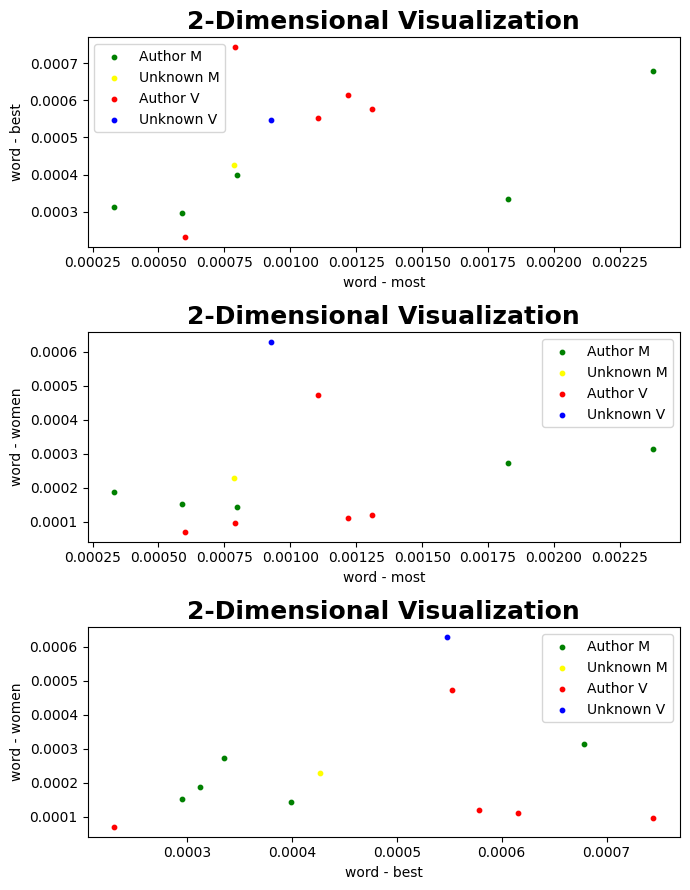

In [35]:
fig = plt.figure(figsize=(7, 3 * len(combo)))
axes = []

PT_SIZE = 10
# plt.title('Visualizations of each dimension of analysis against each other dimension in 2-dimensional')

for i in range(len(combo)):
    axes.append(fig.add_subplot(len(combo), 1, i+1))
    axes[i].set_xlabel('word - ' + combo[i][0])
    axes[i].set_ylabel('word - ' + combo[i][1])
    axes[i].set_title('2-Dimensional Visualization', fontdict={'fontweight':'bold', 'fontsize':18})
    axes[i].scatter(author_m[combo[i][0]], author_m[combo[i][1]], s=PT_SIZE, color="green", label='Author M')
    axes[i].scatter(unknown_m[combo[i][0]], unknown_m[combo[i][1]], s=PT_SIZE, color="yellow", label='Unknown M')
    axes[i].scatter(author_v[combo[i][0]], author_v[combo[i][1]], s=PT_SIZE, color="red", label='Author V')
    axes[i].scatter(unknown_v[combo[i][0]], unknown_v[combo[i][1]], s=PT_SIZE, color="blue", label='Unknown V')
    plt.legend(['Author M', 'Unknown M', 'Author V', 'Unknown V'])

fig.tight_layout()

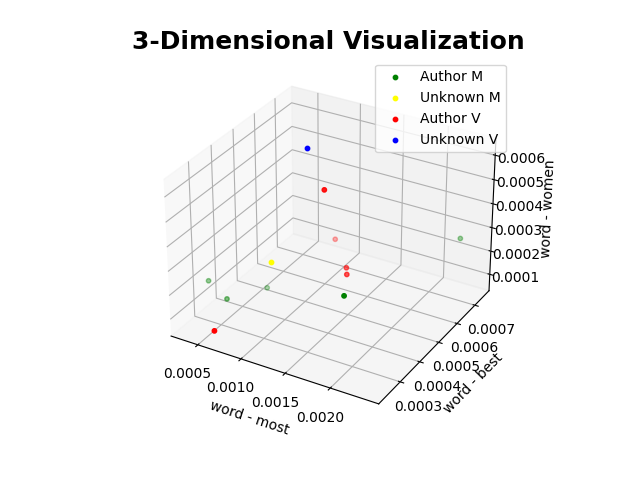

In [64]:
%matplotlib widget

PT_SIZE = 10

ax = plt.axes(projection='3d')

ax.set_xlabel('word - ' + cols[0])
ax.set_ylabel('word - ' + cols[1])
ax.set_zlabel('word - ' + cols[2])
ax.set_title('3-Dimensional Visualization', fontdict={'fontweight':'bold', 'fontsize':18})
ax.scatter(author_m[cols[0]], author_m[cols[1]], author_m[cols[2]], s=PT_SIZE, color="green", label='Author M')
ax.scatter(unknown_m[cols[0]], unknown_m[cols[1]], unknown_m[cols[2]], s=PT_SIZE, color="yellow", label='Unknown M')
ax.scatter(author_v[cols[0]], author_v[cols[1]], author_v[cols[2]], s=PT_SIZE, color="red", label='Author V')
ax.scatter(unknown_v[cols[0]], unknown_v[cols[1]], unknown_v[cols[2]], s=PT_SIZE, color="blue", label='Unknown V')
plt.legend(['Author M', 'Unknown M', 'Author V', 'Unknown V'])

# Question 7 : KNN Analysis

## Steps for KNN analysis for unknown author M and Unknown Author V

Step 1 : For unknown author M, I analied the author M and author V data sets and three dimensions (word frequency) majority in author M.

Same for unknown author V data set, again I analied the author M and author V data sets and selected three dimensions (word frequency) majority in author V.

Step 2 : So based on the above analysis I selected 3 dimensions as **'abandoned', 'binding', 'borne'** and created train_data data for the unknown author M.
I selected 3 dimensions as **'goodness', 'endless','tears'** and created train_data data for the unknown author V.

Step 3 : I selected my distance function as mentioned below. Here, x,y and z are 3 dimensions (word frequency) respectively.

$$
distance = \sqrt{\Delta x^2 + \Delta y^2 + \Delta z^2}
$$ 

Step 4 : Define **get_neighbour** function to calculate distance between given unknown data point to author M/author V data point.

Step 5 : Generate the 'Distance' column in train_data and sort the data by 'Distance' column.

Step 6 : For k = 5, I selected the first 5 sorted rows to identify the nearest data set from an unknown author data point.
         For k = 7, I selected the first 7 sorted rows to identify the nearest data set from an unknown author data point.
         
Step 7 : From the selected rows, I am counting whether the data point is Author M or Author V. From that I am managing the below two count variables. **(author_m_count and author_v_count)**

Step 8 : For Author M, if **author_m_count > author_v_count** then KNN Successful because Unknown Author M data set belongs to Author M.
For Author V, if **author_m_count < author_v_count** then KNN Successful because Unknown Author V data set belongs to Author V.


## KNN analysis success:

From the below results it's clear that, Unknown author M data points belows to author M and Unknown author V data points belows to author V.

Here, KNN Analysis became successful because I chose the major data set (word frequency) present in author M, while calculating unknown author M and vice versa. Therefore, KNN analysis succeeds in all cases.


## KNN analysis for unknown author M and K = 5

In [37]:
train_cols = ['abandoned', 'binding', 'borne']
train_data = final_result[train_cols]
train_data.drop(['um', 'uv'], inplace=True)

train_data_index = train_data.index
for i in list(train_data_index):
    if(i.startswith('m')):
        train_data.loc[i, 'Author'] = 'Author M'
    elif(i.startswith('v')):
        train_data.loc[i, 'Author'] = 'Author V'

train_data

C:\Users\viral\AppData\Local\Temp\ipykernel_15008\3623400437.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(['um', 'uv'], inplace=True)
C:\Users\viral\AppData\Local\Temp\ipykernel_15008\3623400437.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.loc[i, 'Author'] = 'Author M'


,abandoned,binding,borne,Author
m1,0.000020,0.000000,0.000061,Author M
m2,0.000063,0.000000,0.000021,Author M
m3,0.000010,0.000019,0.000067,Author M
m4,0.000000,0.000030,0.000030,Author M
m5,0.000000,0.000026,0.000052,Author M
v1,0.000023,0.000000,0.000000,Author V
v2,0.000025,0.000025,0.000062,Author V
v3,0.000039,0.000000,0.000079,Author V
v4,0.000000,0.000000,0.000000,Author V
v5,0.000033,0.000000,0.000055,Author V


## Distance Function

$$
distance = \sqrt{\Delta x^2 + \Delta y^2 + \Delta z^2}
$$ 

In [38]:
def distance(p1, p2):
    z = zip(list(p1), list(p2))
    sqrt = map(lambda t: (t[0] - t[1])**2, z)
    return np.sqrt(np.sum([*sqrt]))

In [39]:
distance(pd.Series([0,0,0]), pd.Series([0,4,3]))

5.0

In [40]:
unknwn_m = df6[train_cols]
unknwn_m

,abandoned,binding,borne
um,0.000011,0.000022,0.000142


In [41]:
def get_neighbour(u, n):
    dist = distance(u[train_cols], n[train_cols])
    return dist

In [42]:
for idx in list(train_data_index):
    train_data.loc[idx, 'Distance'] = get_neighbour(unknwn_m.iloc[0], train_data.loc[idx])

train_data

C:\Users\viral\AppData\Local\Temp\ipykernel_15008\1097840980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.loc[idx, 'Distance'] = get_neighbour(unknwn_m.iloc[0], train_data.loc[idx])


,abandoned,binding,borne,Author,Distance
m1,0.000020,0.000000,0.000061,Author M,0.000085
m2,0.000063,0.000000,0.000021,Author M,0.000134
m3,0.000010,0.000019,0.000067,Author M,0.000076
m4,0.000000,0.000030,0.000030,Author M,0.000113
m5,0.000000,0.000026,0.000052,Author M,0.000091
v1,0.000023,0.000000,0.000000,Author V,0.000144
v2,0.000025,0.000025,0.000062,Author V,0.000082
v3,0.000039,0.000000,0.000079,Author V,0.000073
v4,0.000000,0.000000,0.000000,Author V,0.000144
v5,0.000033,0.000000,0.000055,Author V,0.000093


In [43]:
k = 5
train_data.sort_values(by=['Distance'], inplace=True)
unknwn_m_1 = train_data.head(k)
unknwn_m_1

C:\Users\viral\AppData\Local\Temp\ipykernel_15008\559727479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.sort_values(by=['Distance'], inplace=True)


,abandoned,binding,borne,Author,Distance
v3,0.000039,0.000000,0.000079,Author V,0.000073
m3,0.000010,0.000019,0.000067,Author M,0.000076
v2,0.000025,0.000025,0.000062,Author V,0.000082
m1,0.000020,0.000000,0.000061,Author M,0.000085
m5,0.000000,0.000026,0.000052,Author M,0.000091


In [44]:
author_v_count = 0
author_m_count = 0
for i in list(unknwn_m_1.index):
    if(i.startswith('m')):
        author_m_count +=1
    elif(i.startswith('v')):
        author_v_count +=1

print("Author M Count :", author_m_count)
print("Author V Count :", author_v_count)

if(author_m_count > author_v_count):
    print("KNN successful for Unknown Author M data set and k = 5.")
else:
    print("KNN not successful for Unknown Author M data set and k = 5.")

Author M Count : 3
Author V Count : 2
KNN successful for Unknown Author M data set and k = 5.


## Result for K = 5 and unknown author M

1. Calculated distance function from unknown point to train data points and shorted the table by Distance column so able to find nearest point from the train_data.

2. From the result count, **unknown author M data belongs to Author M**. 

## KNN analysis for unknown author M and K = 7

In [45]:
k = 7
unknwn_m_2 = train_data.head(k)
unknwn_m_2

,abandoned,binding,borne,Author,Distance
v3,0.000039,0.000000,0.000079,Author V,0.000073
m3,0.000010,0.000019,0.000067,Author M,0.000076
v2,0.000025,0.000025,0.000062,Author V,0.000082
m1,0.000020,0.000000,0.000061,Author M,0.000085
m5,0.000000,0.000026,0.000052,Author M,0.000091
v5,0.000033,0.000000,0.000055,Author V,0.000093
m4,0.000000,0.000030,0.000030,Author M,0.000113


In [46]:
author_v_count = 0
author_m_count = 0
for i in list(unknwn_m_2.index):
    if(i.startswith('m')):
        author_m_count +=1
    elif(i.startswith('v')):
        author_v_count +=1

print("Author M Count :", author_m_count)
print("Author V Count :", author_v_count)

if(author_m_count > author_v_count):
    print("KNN successful for Unknown Author M data set and k = 7.")
else:
    print("KNN not successful for Unknown Author M data set and k = 7.")

Author M Count : 4
Author V Count : 3
KNN successful for Unknown Author M data set and k = 7.


## Result for K = 7 and unknown author M

1. Calculated distance function from unknown point to train data points and shorted the table by Distance column so able to find nearest point from the train_data.

2. From the result count, **unknown author M data belongs to Author M**. 

## KNN analysis for unknown author V and K = 5

I selected 3 dimensions as below and created train_data data for the same.

In [47]:
train_cols = ['goodness', 'endless', 'tears']
train_data = final_result[train_cols]
train_data.drop(['um', 'uv'], inplace=True)

train_data_index = train_data.index
for i in list(train_data_index):
    if(i.startswith('m')):
        train_data.loc[i, 'Author'] = 'Author M'
    elif(i.startswith('v')):
        train_data.loc[i, 'Author'] = 'Author V'

train_data

C:\Users\viral\AppData\Local\Temp\ipykernel_15008\4006470348.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(['um', 'uv'], inplace=True)
C:\Users\viral\AppData\Local\Temp\ipykernel_15008\4006470348.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.loc[i, 'Author'] = 'Author M'


,goodness,endless,tears,Author
m1,0.000041,0.000000,0.000438,Author M
m2,0.000125,0.000000,0.000125,Author M
m3,0.000029,0.000000,0.000133,Author M
m4,0.000000,0.000030,0.000000,Author M
m5,0.000000,0.000052,0.000000,Author M
v1,0.000116,0.000023,0.000300,Author V
v2,0.000037,0.000000,0.000295,Author V
v3,0.000105,0.000053,0.000171,Author V
v4,0.000048,0.000016,0.000333,Author V
v5,0.000109,0.000076,0.000185,Author V


In [48]:
unknwn_v = df12[train_cols]
unknwn_v

,goodness,endless,tears
uv,0.000162,0.000018,0.000162


In [49]:
for idx in list(train_data_index):
    train_data.loc[idx, 'Distance'] = get_neighbour(unknwn_v.iloc[0], train_data.loc[idx])

train_data

C:\Users\viral\AppData\Local\Temp\ipykernel_15008\783818955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.loc[idx, 'Distance'] = get_neighbour(unknwn_v.iloc[0], train_data.loc[idx])


,goodness,endless,tears,Author,Distance
m1,0.000041,0.000000,0.000438,Author M,0.000302
m2,0.000125,0.000000,0.000125,Author M,0.000055
m3,0.000029,0.000000,0.000133,Author M,0.000137
m4,0.000000,0.000030,0.000000,Author M,0.000229
m5,0.000000,0.000052,0.000000,Author M,0.000231
v1,0.000116,0.000023,0.000300,Author V,0.000146
v2,0.000037,0.000000,0.000295,Author V,0.000184
v3,0.000105,0.000053,0.000171,Author V,0.000067
v4,0.000048,0.000016,0.000333,Author V,0.000206
v5,0.000109,0.000076,0.000185,Author V,0.000082


In [50]:
k = 5
train_data.sort_values(by=['Distance'], inplace=True)
unknwn_v_1 = train_data.head(k)
unknwn_v_1

C:\Users\viral\AppData\Local\Temp\ipykernel_15008\3736270870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.sort_values(by=['Distance'], inplace=True)


,goodness,endless,tears,Author,Distance
m2,0.000125,0.000000,0.000125,Author M,0.000055
v3,0.000105,0.000053,0.000171,Author V,0.000067
v5,0.000109,0.000076,0.000185,Author V,0.000082
m3,0.000029,0.000000,0.000133,Author M,0.000137
v1,0.000116,0.000023,0.000300,Author V,0.000146


In [51]:
author_v_count = 0
author_m_count = 0
for i in list(unknwn_v_1.index):
    if(i.startswith('m')):
        author_m_count +=1
    elif(i.startswith('v')):
        author_v_count +=1

print("Author M Count :", author_m_count)
print("Author V Count :", author_v_count)

if(author_m_count < author_v_count):
    print("KNN successful for Unknown Author V data set and k = 5.")
else:
    print("KNN not successful for Unknown Author V data set and k = 5.")

Author M Count : 2
Author V Count : 3
KNN successful for Unknown Author V data set and k = 5.


## Result for K = 5 and unknown author V

1. Calculated distance function from unknown point to train data points and shorted the table by Distance column so able to find nearest point from the train_data.

2. From the result count, **unknown author V data belongs to Author V**. 

## KNN analysis for unknown author V and K = 7

In [52]:
k = 7
train_data.sort_values(by=['Distance'], inplace=True)
unknwn_v_2 = train_data.head(k)
unknwn_v_2

C:\Users\viral\AppData\Local\Temp\ipykernel_15008\3183920548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.sort_values(by=['Distance'], inplace=True)


,goodness,endless,tears,Author,Distance
m2,0.000125,0.000000,0.000125,Author M,0.000055
v3,0.000105,0.000053,0.000171,Author V,0.000067
v5,0.000109,0.000076,0.000185,Author V,0.000082
m3,0.000029,0.000000,0.000133,Author M,0.000137
v1,0.000116,0.000023,0.000300,Author V,0.000146
v2,0.000037,0.000000,0.000295,Author V,0.000184
v4,0.000048,0.000016,0.000333,Author V,0.000206


In [53]:
author_v_count = 0
author_m_count = 0
for i in list(unknwn_v_2.index):
    if(i.startswith('m')):
        author_m_count +=1
    elif(i.startswith('v')):
        author_v_count +=1

print("Author M Count :", author_m_count)
print("Author V Count :", author_v_count)

if(author_m_count < author_v_count):
    print("KNN successful for Unknown Author V data set and k = 7.")
else:
    print("KNN not successful for Unknown Author V data set and k = 7.")

Author M Count : 2
Author V Count : 5
KNN successful for Unknown Author V data set and k = 7.


## Result for K = 7 and unknown author V

1. Calculated distance function from unknown point to train data points and shorted the table by Distance column so able to find nearest point from the train_data.

2. From the result count, **unknown author V data belongs to Author V**. 

# 3 Dimensional scatter plot for K = 5 and unknown author V

In [54]:
idx = list(train_data.index)
# print(train_data.iloc[0, 0])
train_data

,goodness,endless,tears,Author,Distance
m2,0.000125,0.000000,0.000125,Author M,0.000055
v3,0.000105,0.000053,0.000171,Author V,0.000067
v5,0.000109,0.000076,0.000185,Author V,0.000082
m3,0.000029,0.000000,0.000133,Author M,0.000137
v1,0.000116,0.000023,0.000300,Author V,0.000146
v2,0.000037,0.000000,0.000295,Author V,0.000184
v4,0.000048,0.000016,0.000333,Author V,0.000206
m4,0.000000,0.000030,0.000000,Author M,0.000229
m5,0.000000,0.000052,0.000000,Author M,0.000231
m1,0.000041,0.000000,0.000438,Author M,0.000302


In [55]:
auth_m = train_data.loc[train_data['Author'].isin(['Author M'])]
auth_m

,goodness,endless,tears,Author,Distance
m2,0.000125,0.000000,0.000125,Author M,0.000055
m3,0.000029,0.000000,0.000133,Author M,0.000137
m4,0.000000,0.000030,0.000000,Author M,0.000229
m5,0.000000,0.000052,0.000000,Author M,0.000231
m1,0.000041,0.000000,0.000438,Author M,0.000302


In [56]:
auth_v = train_data.loc[train_data['Author'].isin(['Author V'])]
auth_v

,goodness,endless,tears,Author,Distance
v3,0.000105,0.000053,0.000171,Author V,0.000067
v5,0.000109,0.000076,0.000185,Author V,0.000082
v1,0.000116,0.000023,0.000300,Author V,0.000146
v2,0.000037,0.000000,0.000295,Author V,0.000184
v4,0.000048,0.000016,0.000333,Author V,0.000206


In [57]:
unknwn_v

,goodness,endless,tears
uv,0.000162,0.000018,0.000162


In [58]:
x = [train_data.iloc[0, 0], unknwn_v.iloc[0, 0]]
x

[0.0001249, 0.0001616]

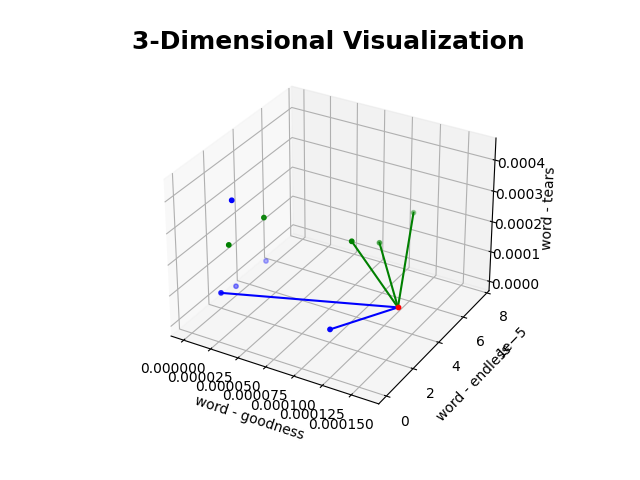

In [63]:
%matplotlib widget

PT_SIZE = 10
k = 5

ax = plt.axes(projection='3d')

ax.set_xlabel('word - ' + train_cols[0])
ax.set_ylabel('word - ' + train_cols[1])
ax.set_zlabel('word - ' + train_cols[2])
ax.set_title('3-Dimensional Visualization', fontdict={'fontweight':'bold', 'fontsize':18})
ax.scatter(auth_m[train_cols[0]], auth_m[train_cols[1]], auth_m[train_cols[2]], s=PT_SIZE, color="blue", label="Author M")
ax.scatter(auth_v[train_cols[0]], auth_v[train_cols[1]], auth_v[train_cols[2]], s=PT_SIZE, color="green", label="Author V")
ax.scatter(unknwn_v[train_cols[0]], unknwn_v[train_cols[1]], unknwn_v[train_cols[2]], s=PT_SIZE, color="red")
# plt.legend(['Author M', 'Author V', 'Unknown V'])

for i in range(k):
    clr = "blue" if idx[i].startswith('m') else "green"
    x, y, z = [train_data.iloc[i, 0], unknwn_v.iloc[0, 0]], [train_data.iloc[i, 1], unknwn_v.iloc[0, 1]], [train_data.iloc[i, 2], unknwn_v.iloc[0, 2]]
    ax.plot(x, y, z, color=clr)